In [266]:
import pandas as pd
import numpy as np
import re
import numpy as np

ModuleNotFoundError: No module named 'scikitlear'

In [52]:
df = pd.read_csv('train.csv')

In [49]:
print(df.shape)
print(df.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            0 non-null float64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 83.6+ KB
None


In [491]:
df.head()

newdf = df.iloc[:,:]

In [643]:
def normalize_data(df):
    
    # Пытаемся получить палубу по каюте
    reg = '[ABCDEFG]\d{1,}$'
    pattern = re.compile(reg)

    def split_cabin(row):    
        #print(type(row['Cabin']))
        if isinstance(row['Cabin'], str):                
            if pattern.match(row['Cabin']):
                row['deck'] = row['Cabin'][0:1]
        return row

    df = df.apply(split_cabin, axis = 1)
    
    #Формируем новую колонку "обращение" на основании имени пассажира
    df['title'] = df['Name'].str.extract('\s{1}([A-Z]{1}[a-z]+\.)*')
    
    title = df['title'].value_counts().keys()[0]
    
    def fillna(df, column):        
        title = df[column].value_counts().keys()[0]
    
        def fix_title(row, col):    
            if not isinstance(row[col], str):
                row[col] = title
            return row

        df = df.apply(fix_title, axis = 1, col = column)
        
        return df

    #Заполняем обращение наиболее частыми обращениями    
    df = fillna(df, 'title'); 
    #Заполняем палубу наиболее частыми палубами    
    df = fillna(df, 'deck');
    
    # Заполняем недостающие возрасты в зависимости от обращения
    titles = df['title'].value_counts().keys()
    ages = {}
    for title in titles:    
        if title != False:
            ages[title] = df[df['title'] == title]['Age'].mean()
            if pd.isna(ages[title]):
                ages[title] = df['Age'].mean()
            
    def fix_ages(row, ages):                
        if pd.isna(row['Age']):            
            row['Age'] = ages[row['title']]
        return row

    df = df.apply(fix_ages, axis = 1, ages = ages)
    
    #Кодируем оставщиеся колонки
    df = pd.get_dummies(df, columns=['title', 'Embarked', 'Sex', 'deck', 'Pclass'], drop_first = True)
    
    # Дропаем лишние столбцы
    df.drop(['Cabin'], axis = 1, inplace = True)
    df.drop(['Ticket'], axis = 1, inplace = True)
    df.drop(['Fare'], axis = 1, inplace = True)
    df.drop(['Name'], axis = 1, inplace = True)
    #df.drop(['title'], axis = 1, inplace = True)
    #df.drop(['Embarked_Q'], axis = 1, inplace = True)
    #df.drop(['deck_D'], axis = 1, inplace = True)
    #df.drop(['deck_G'], axis = 1, inplace = True)
    #df.drop(['deck_B'], axis = 1, inplace = True)
    #df.drop(['deck_F'], axis = 1, inplace = True)
    
    return df

In [448]:
newdf = normalize_data(newdf)
newdf.notna().all()

Age                True
Embarked_Q         True
Embarked_S         True
Parch              True
PassengerId        True
Sex_1              True
SibSp              True
Survived           True
title_Col.         True
title_Don.         True
title_Dr.          True
title_Jonkheer.    True
title_Major.       True
title_Master.      True
title_Miss.        True
title_Mlle.        True
title_Mme.         True
title_Mr.          True
title_Mrs.         True
title_Ms.          True
title_Rev.         True
deck_B             True
deck_C             True
deck_D             True
deck_E             True
deck_F             True
deck_G             True
Pclass_2           True
Pclass_3           True
dtype: bool

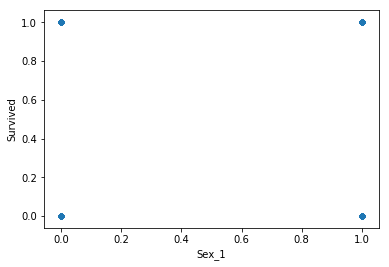

In [366]:
#Попробуем определить палубу по номеру каюты

reg = '[ABCDEFG]\d{1,}$'
pattern = re.compile(reg)

def split_cabin(row):    
    #print(type(row['Cabin']))
    if isinstance(row['Cabin'], str):                
        if pattern.match(row['Cabin']):
            row['deck'] = row['Cabin'][0:1]
    return row

newdf = newdf.apply(split_cabin, axis = 1)

In [312]:
print(newdf[newdf['deck'].notna()].shape[0])
print(newdf[newdf['deck'].isna()].shape[0])

176
715


In [220]:
#Попробуем отнести пассажира к тому или иному классу на основании цены, которую он заплатил за билет

In [367]:
classes = newdf['deck'].value_counts().keys()
print(counts)
fare = {}
for passclass in classes:    
    if passclass != False:
        fare[passclass] = newdf[newdf['deck'] == passclass]['Fare'].median()
print(fare)

Index(['C', 'B', 'E', 'D', 'A', 'F', False, 'G'], dtype='object')
{'C': 78.85, 'B': 71.0, 'E': 45.18125, 'D': 75.25, 'A': 35.5, 'F': 26.0, 'G': 13.58125}


In [368]:
newdf['title'] = newdf['Name'].str.extract('\s{1}([A-Z]{1}[a-z]+\.)*')

In [369]:
#print(newdf['title'])

title = newdf['title'].value_counts().keys()[0]

def fillna(column):
    global newdf
    title = newdf[column].value_counts().keys()[0]
    
    def fix_title(row, col):    
        if not isinstance(row[col], str):
            row[col] = title
        return row

    newdf = newdf.apply(fix_title, axis = 1, col = column)

fillna('title');
fillna('deck');

In [370]:
print(newdf.notna().all())
newdf['deck'].value_counts()

Age            False
Cabin          False
Embarked_Q      True
Embarked_S      True
Fare            True
Name            True
Parch           True
PassengerId     True
Pclass          True
Sex_1           True
SibSp           True
Survived        True
Ticket          True
deck            True
title           True
dtype: bool


C    766
B     36
E     32
D     29
A     15
F      9
G      4
Name: deck, dtype: int64

In [371]:
newdf.drop(['Cabin'], axis = 1, inplace = True)
newdf.drop(['Ticket'], axis = 1, inplace = True)
newdf.drop(['Fare'], axis = 1, inplace = True)

In [375]:
#newdf.drop(['Name'], axis = 1, inplace = True)



newdf['Age'].map(test)

22.0
38.0
26.0
35.0
35.0
nan
54.0
2.0
27.0
14.0
4.0
58.0
20.0
39.0
14.0
55.0
2.0
nan
31.0
nan
35.0
34.0
15.0
28.0
8.0
38.0
nan
19.0
nan
nan
40.0
nan
nan
66.0
28.0
42.0
nan
21.0
18.0
14.0
40.0
27.0
nan
3.0
19.0
nan
nan
nan
nan
18.0
7.0
21.0
49.0
29.0
65.0
nan
21.0
28.5
5.0
11.0
22.0
38.0
45.0
4.0
nan
nan
29.0
19.0
17.0
26.0
32.0
16.0
21.0
26.0
32.0
25.0
nan
nan
0.83
30.0
22.0
29.0
nan
28.0
17.0
33.0
16.0
nan
23.0
24.0
29.0
20.0
46.0
26.0
59.0
nan
71.0
23.0
34.0
34.0
28.0
nan
21.0
33.0
37.0
28.0
21.0
nan
38.0
nan
47.0
14.5
22.0
20.0
17.0
21.0
70.5
29.0
24.0
2.0
21.0
nan
32.5
32.5
54.0
12.0
nan
24.0
nan
45.0
33.0
20.0
47.0
29.0
25.0
23.0
19.0
37.0
16.0
24.0
nan
22.0
24.0
19.0
18.0
19.0
27.0
9.0
36.5
42.0
51.0
22.0
55.5
40.5
nan
51.0
16.0
30.0
nan
nan
44.0
40.0
26.0
17.0
1.0
9.0
nan
45.0
nan
28.0
61.0
4.0
1.0
21.0
56.0
18.0
nan
50.0
30.0
36.0
nan
nan
9.0
1.0
4.0
nan
nan
45.0
40.0
36.0
32.0
19.0
19.0
3.0
44.0
58.0
nan
42.0
nan
24.0
28.0
nan
34.0
45.5
18.0
2.0
32.0
26.0
16.0
40.0
24.0
35.0
2

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [383]:
titles = newdf['title'].value_counts().keys()
ages = {}
for title in titles:    
    if title != False:
        ages[title] = newdf[newdf['title'] == title]['Age'].mean()
print(ages)

def fix_ages(row):
    if pd.isna(row['Age']):
        row['Age'] = ages[row['title']]
    return row

newdf = newdf.apply(fix_ages, axis = 1)

{'Mr.': 32.30759803921562, 'Miss.': 21.846153846153843, 'Mrs.': 36.18269230769231, 'Master.': 4.574166666666667, 'Dr.': 42.0, 'Rev.': 43.166666666666664, 'Mlle.': 24.0, 'Major.': 48.5, 'Col.': 58.0, 'Don.': 40.0, 'Mme.': 24.0, 'Ms.': 28.0, 'Jonkheer.': 38.0, 'Capt.': 70.0}


In [390]:
newdf.head()
newdf = pd.get_dummies(newdf, columns=['title', 'deck', 'Pclass'], drop_first = True)
newdf.drop(['Name'], axis = 1, inplace = True)
newdf.head()

KeyError: "['title' 'deck' 'Pclass'] not in index"

In [393]:
newdf.head()
newdf.to_csv('prepared.csv')

In [662]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

newdf = pd.read_csv('train.csv')

newdf = normalize_data(newdf)

passenger = newdf['PassengerId']

newdf.drop(['Embarked_Q','deck_D','deck_B', 'title_Rev.', 'deck_G', 'title_Major.',
 'title_Dr.', 'title_Mlle.', 'deck_F', 'title_Don.', 'title_Jonkheer.',
 'title_Col.', 'title_Ms.', 'title_Mme.']
, axis = 1, inplace = True)

X = newdf.drop(['Survived', 'PassengerId'], axis = 1)
y = newdf['Survived']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

params = {'n_estimators': range(1, 20), 'max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_features': range(1, X_train.shape[1])}

#clf = RandomForestClassifier();

#cv = GridSearchCV(clf, params, cv = 5)

#cv.fit(X_train, y_train)

#print(cv.best_params_)
#print(cv.best_score_)

In [699]:
forest = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 10, max_features = 5, n_jobs=-2)

   

forest.fit(X, y)
forest.score(X_test, y_test)

0.8659217877094972

In [667]:
testdf = pd.read_csv('test.csv')

In [668]:
testdf = normalize_data(testdf)

for column in X.columns:
    if column not in testdf.columns:
        testdf[column] = 0

testdf.drop(['Embarked_Q','deck_D','deck_B', 'title_Rev.', 'deck_G', 'title_Major.',
 'title_Dr.', 'title_Mlle.', 'deck_F', 'title_Don.', 'title_Jonkheer.',
 'title_Col.', 'title_Ms.', 'title_Mme.']
, axis = 1, inplace = True, errors = 'ignore')

X_test_data = testdf.drop(['PassengerId'], axis = 1)

In [656]:
for column in X.columns:
    if column not in X_test_data.columns:
        X_test_data[column] = 0


In [669]:
X_test_data.notna().all()

Age              True
Parch            True
SibSp            True
title_Master.    True
title_Miss.      True
title_Mr.        True
title_Mrs.       True
Embarked_S       True
Sex_male         True
deck_C           True
deck_E           True
Pclass_2         True
Pclass_3         True
dtype: bool

In [700]:
predict = forest.predict(X_test_data)

In [701]:
print(predict)

predicted = pd.DataFrame({'PassengerId' : testdf['PassengerId'], 'Survived' : predict})

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


In [702]:
predicted.head()
predicted.to_csv('predicted_7.csv', index = False)


In [673]:
features = pd.DataFrame({'cols':X.columns, 'imp':forest.feature_importances_}
                       ).sort_values('imp', ascending=False)
valueable_features = features[features['imp'] < 0.01]
print(valueable_features['cols'].values)

[]
